<a href="https://colab.research.google.com/github/EbunMak/CelluCoat-Co-Culture-model/blob/main/coculture_model_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


In [16]:
# parameter values for G. Hensenaii
mumax = 0.048      # 1/hour
Ks = 20        # g/liter
Yxs = 0.105      # g/g
Si = 19        # g/liter


def mu(S):
    return (mumax*S)/(Ks + S)

def d(t,x):
  X=x
  dX = X*mu(Si)
  return dX

#Defining inputs for Radau function
#Time interval
t_span = [0,50] 
#Initial condition
y0 = [0.15] 
t_eval = np.linspace(0,50,10000)

#Calling IVP solver from scipy
sol = solve_ivp(d,t_span,y0,t_eval=t_eval)
t_sol = sol.t
y_sol = sol.y[0]

Text(0.5, 1.0, 'Concentration of G. Hensenaii vs. Time')

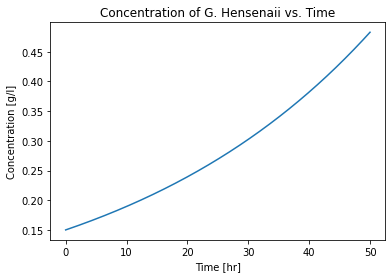

In [17]:
plt.plot(t_sol,y_sol)
plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/l]')
plt.title('Concentration of G. Hensenaii vs. Time')

Text(0.5, 1.0, 'Concentration of E. Coli vs. Time')

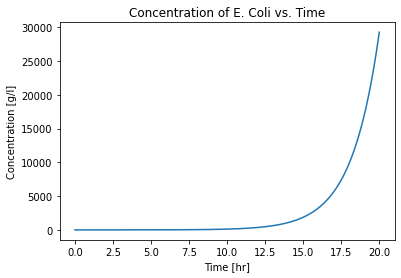

In [ ]:
# parameter values for E. coli 

mumax = 0.55     # 1/hour
Ks = 0.0024      # g/liter
Yxs = 0.067       # g/g
Si = 19          # g/liter

def mu(S):
    return (mumax*S)/(Ks + S)

def d(t,x):
  X=x
  dX = X*mu(Si)
  return dX

#Defining inputs for Radau function
#Time interval
t_span = [0,20] 
#Initial condition
y0 = [0.49] 
t_eval = np.linspace(0,20,1000)

#Calling IVP solver from scipy
sol = sol = solve_ivp(d,t_span,y0,t_eval=t_eval)
t_sol = sol.t
y_sol = sol.y[0]

plt.plot(t_sol,y_sol)
plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/l]')
plt.title('Concentration of E. Coli vs. Time')

In [20]:
from gc import collect
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# parameter values
mumax_xyl = 0.048      # 1/hour
Ksxyl = 20        # g/liter
Yxsxyl = 0.105      # g/g
Si = 19        # g/liter

mumax = 0.55     # 1/hour
Kscol = 0.0024  # g/liter
Yxscol = 0.06    # g/g

# reaction rates
def mu(S,Ks):
    return mumax*S/(Ks + S)

# differential equations
def xdot(x,t):
    Xxyl,Xcol,S = x
    dXxyl = Xxyl*mu(S,Ksxyl)
    dXcol = Xcol*mu(S,Kscol)
    dS = -((Xxyl*mu(S,Ksxyl))/Yxsxyl + (Xcol*mu(S,Kscol))/Yxscol)
    return [dXxyl,dXcol,dS]


Text(0.5, 1.0, 'Concentration of Glucose vs. Time')

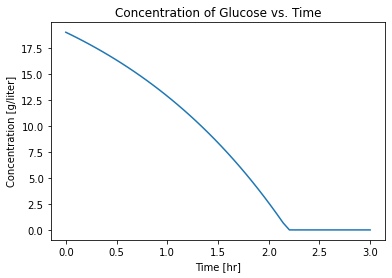

In [21]:
IC = [0.15, 0.47, 19]

t = np.linspace(0,3,50)
sol = odeint(xdot,IC,t)
Xxyl,Xcol,S = sol.transpose()


plt.plot(t,S)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.title('Concentration of Glucose vs. Time')
#plt.legend(['G.xyl Conc.',
            #'E.col Conc.',
            #'Substrate Conc.']

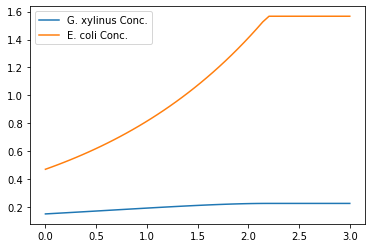

In [22]:
plt.plot(t,Xxyl)
plt.plot(t,Xcol)

plt.legend(['G. xylinus Conc.',
            'E. coli Conc.'])